# Principal Component Analysis (PCA) in Python

## Understanding the Data
Before you go ahead and load the data, it's good to understand and look at the data that you will be working with!

### Breast Cancer
The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.\
The malignant class has 212 samples, whereas the benign class has 357 samples. It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.\
You can download the breast cancer dataset with the help of the sklearn library.

In [55]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [3]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [9]:
final_breast_data = np.concatenate([breast_data,breast_labels.reshape((569,1))],axis=1)
final_breast_data.shape

(569, 31)

In [12]:
features = breast.feature_names
features_labels = np.append(features,'label')

breast_dataset = pd.DataFrame(final_breast_data,columns = features_labels)
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Since the original labels are in 0,1 format, you will change the labels to benign and malignant using .replace function. You will use inplace=True which will modify the dataframe breast_dataset.

In [31]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [14]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [15]:
x.shape

(569, 30)

In [16]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [17]:
normalised_breast = pd.DataFrame(x,columns=features)
normalised_breast.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


## Data Visualization using PCA
PCA projects turn high-dimensional data into a low-dimensional principal component, now is the time to visualize that with the help of Python!

In [50]:
from sklearn.decomposition import PCA
pca_breast = PCA(2)
principalComponents_breast = pca_breast.fit_transform(x)

In [51]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


In [52]:
feat_cols = ['principal_component_'+str(i) for i in range(2)]

principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = feat_cols )

principal_breast_Df.tail()

,principal_component_0,principal_component_1
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


<Figure size 432x288 with 0 Axes>

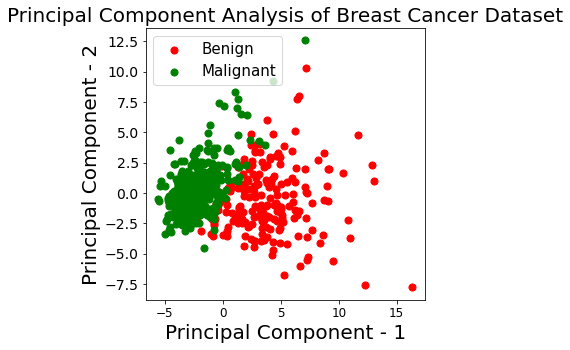

In [59]:
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal_component_0']
               , principal_breast_Df.loc[indicesToKeep, 'principal_component_1'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

## Speeding Machine Learning (ML) Algorithm: 
Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

Here, you can also pass how much variance you want PCA to capture. Let's pass 0.95 as a parameter to the PCA model, which means that PCA will hold 90% of the variance and the number of components required to capture 95% variance will be used.

In [60]:
from sklearn.decomposition import PCA
pca_breast = PCA(0.95)
principalComponents_breast = pca_breast.fit_transform(x)

In [62]:
pca_breast.n_components_

10

From the above output, you can observe that to achieve 95% variance, the dimension was reduced to 10 principal components from the actual 30 dimensions.

**Now, we can used any classification ML algorithm for classified breast cancer or not.**